In [13]:
import warnings
warnings.filterwarnings("ignore")

import os, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, glob
from pynwb import NWBHDF5IO
from pathlib import Path
from convnwb.io import load_nwbfile
from scipy.ndimage import gaussian_filter1d

import sys
sys.path.append('../code/ephys_qc')

from ephys_utills import get_et_timebins, compute_pixelperDVA, et_heatmap


In [14]:
sess_files = sorted(glob.glob('../data/000623/sub-CS53*/*.nwb'))
for sess_file in sess_files:
    nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
    break
nwbfile

Data type,int64
Shape,"(603,)"
Array size,4.71 KiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(603,)"
Array size,4.71 KiB
Chunk shape,None


In [19]:
SEC2MSEC = 1000.
nwb_input_dir = '../data/000623/'

# ----- Basic metadata info about the video stimulus -----
frame_width, frame_height, vid_fps, nframes = 640, 480, 25.0, 11971

frame_duration_msec = SEC2MSEC / vid_fps
framesize = [frame_width, frame_height]

# define a duration to timebin the ET data
timebin_sec = 1.0 # define here as sec. used for saving results
timebin_msec = timebin_sec * SEC2MSEC # millisec.

nbins = np.round(frame_duration_msec * nframes / timebin_msec).astype(int)

nwb_session_files = sorted(glob.glob(os.path.join(nwb_input_dir, 'sub-*/*.nwb')))

# ----- Read ET (gaze) data from the NWB files -----
etdata_ses = []
pixel_dva_ses = []
missingdata_ratio = []
session_ids_et = []
select_subj_id, i = 0, 0
for session_ii in nwb_session_files:
    print(f'processing {os.path.basename(session_ii)}...')

    if 'P54CSR1' in session_ii:
        select_subj_id = i
    i += 1

    # Open the NWB file and read its content
    with NWBHDF5IO(session_ii,'r') as nwb_io: 
        nwbfile = nwb_io.read()
        
        session_ids_et.append(nwbfile.identifier)
        
        trials_df = nwbfile.trials.to_dataframe()
        enc_start_time = trials_df[trials_df['stim_phase']=='encoding']['start_time'].values[0]
        enc_stop_time = trials_df[trials_df['stim_phase']=='encoding']['stop_time'].values[0]
        
        gaze_data = nwbfile.processing['behavior']['EyeTracking']['SpatialSeries']
        gaze_xy = np.asarray(gaze_data.data)
        
        if gaze_data.rate is None:
            gaze_time = gaze_data.timestamps
        else:
            gaze_time = np.arange(0,len(gaze_xy))/(gaze_data.rate) + gaze_data.starting_time
        gaze_encoding = np.logical_and(gaze_time >= enc_start_time, 
                                        gaze_time <= enc_stop_time) 
    
        gaze_df = pd.DataFrame(data=np.c_[gaze_time[gaze_encoding],gaze_xy[gaze_encoding,:]],
                                columns=['RecTime','GazeX','GazeY'])    
    
        # get video display info and scale gaze to stimulus size
        display_info_raw = gaze_data.comments
        screen_wh, display_wh, display_area_i = display_info_raw.split('::')
    
        screen_w, screen_h = list(map(float,screen_wh.split('=')[1].split(',')))
        display_w, display_h = list(map(float,display_wh.split('=')[1].split(',')))
        display_area = list(map(float,display_area_i.split('=')[1].split(',')))
    
        _, pixel_dva_mean = compute_pixelperDVA([screen_w,screen_h])
        pixel_dva_ses.append(pixel_dva_mean)
    
        scale_dx = frame_width / display_w
        scale_dy = frame_height / display_h
    
        gaze_df['GazeX'] = (gaze_df['GazeX'] - display_area[0])*scale_dx 
        gaze_df['GazeY'] = (gaze_df['GazeY'] - display_area[1])*scale_dy 
    
        problem_inds_x = np.logical_not(gaze_df['GazeX'].astype(float).between(0,frame_width,
                                                                                inclusive='left'))
        
        problem_inds_y = np.logical_not(gaze_df['GazeY'].astype(float).between(0,frame_height,
                                                                                inclusive='left'))
        problem_inds = np.logical_or(problem_inds_x, problem_inds_y)
        gaze_df.loc[problem_inds,['GazeX','GazeY']] = np.nan
    
    
        # Downsample gaze data to the video frame rate
        et_xy_binned = get_et_timebins(gaze_df, timebin_msec, do_op=None,
                                        fix_length=True, nbins=nbins, keep_timebin_index=False,
                                        )
        
        et_xy_binned_v = np.vstack(et_xy_binned)
        missingdata_ratio.append(np.isnan(et_xy_binned_v).any(axis=1).sum() / et_xy_binned_v.shape[0])
        
        et_xy_binned = np.asarray(et_xy_binned, dtype=object)
        etdata_ses.append(et_xy_binned)


processing sub-CS41_ses-P41CSR1_behavior+ecephys.nwb...
processing sub-CS41_ses-P41CSR2_behavior+ecephys.nwb...
processing sub-CS42_ses-P42CSR1_behavior+ecephys.nwb...
processing sub-CS42_ses-P42CSR2_behavior+ecephys.nwb...
processing sub-CS43_ses-P43CSR1_behavior+ecephys.nwb...
processing sub-CS43_ses-P43CSR2_behavior+ecephys.nwb...
processing sub-CS44_ses-P44CSR1_behavior+ecephys.nwb...
processing sub-CS47_ses-P47CSR1_behavior+ecephys.nwb...
processing sub-CS47_ses-P47CSR2_behavior+ecephys.nwb...
processing sub-CS48_ses-P48CSR1_behavior+ecephys.nwb...
processing sub-CS48_ses-P48CSR2_behavior+ecephys.nwb...
processing sub-CS49_ses-P49CSR1_behavior+ecephys.nwb...
processing sub-CS49_ses-P49CSR2_behavior+ecephys.nwb...
processing sub-CS51_ses-P51CSR1_behavior+ecephys.nwb...
processing sub-CS51_ses-P51CSR2_behavior+ecephys.nwb...
processing sub-CS53_ses-P53CSR1_behavior+ecephys.nwb...
processing sub-CS53_ses-P53CSR2_behavior+ecephys.nwb...
processing sub-CS54_ses-P54CSR1_behavior+ecephys

In [ ]:
subj_EG = etdata_ses[select_subj_id]
print(f'{len(subj_EG)} timepoints')


479 timepoints
(500, 2) pixels


479 timepoints
Combined shape: (239419, 2)


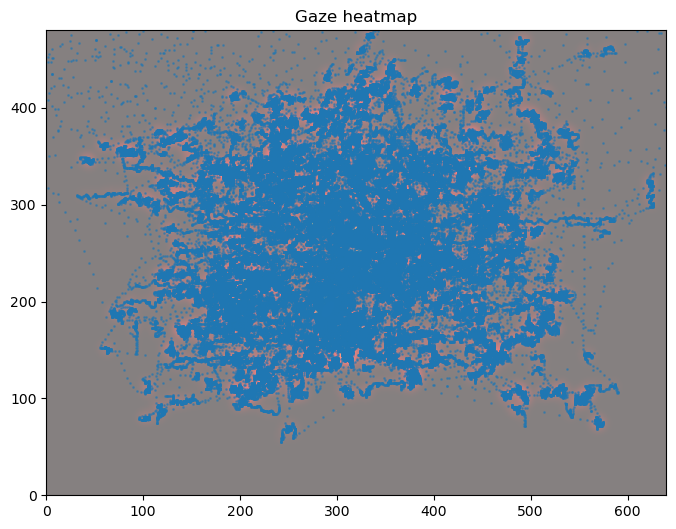

In [34]:
# Get and stack gaze data
subj_EG = etdata_ses[select_subj_id]
print(f'{len(subj_EG)} timepoints')
all_timepoints = np.vstack(subj_EG)
print(f'Combined shape: {all_timepoints.shape}')  # should be (total_timepoints, 2)

# Remove NaNs for plotting
valid_points = ~np.isnan(all_timepoints[:, 0]) & ~np.isnan(all_timepoints[:, 1])
nan_points = ~valid_points

# Plot heatmap
heatmap, xedges, yedges = np.histogram2d(
    all_timepoints[valid_points, 0], all_timepoints[valid_points, 1],
    bins=(frame_width, frame_height),
    range=[[0, frame_width], [0, frame_height]]
)
heatmap = gaussian_filter1d(heatmap, sigma=5, axis=0)
heatmap = gaussian_filter1d(heatmap, sigma=5, axis=1)

# Normalize and convert to image
heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
heatmap_img = np.uint8(heatmap * 255)

# Plot with heatmap
fig, ax = plt.subplots(figsize=(8, 8))
ax.set(title='Gaze heatmap', xlim=(0, frame_width), ylim=(0, frame_height))
ax.set_aspect('equal')
ax.plot(all_timepoints[valid_points, 0], all_timepoints[valid_points, 1], 'o', markersize=1, alpha=0.5)
ax.plot(all_timepoints[nan_points, 0], all_timepoints[nan_points, 1], 'ro', markersize=1, alpha=0.5)
ax.imshow(heatmap_img.T, origin='lower', extent=[0, frame_width, 0, frame_height], cmap='hot', alpha=0.5)
plt.show()
